## Влияет ли наличие конкурентов на доход?

In [13]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

Данные

In [2]:
df = pd.read_csv('../../data/location.csv')
df.head()


,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


Попарный график

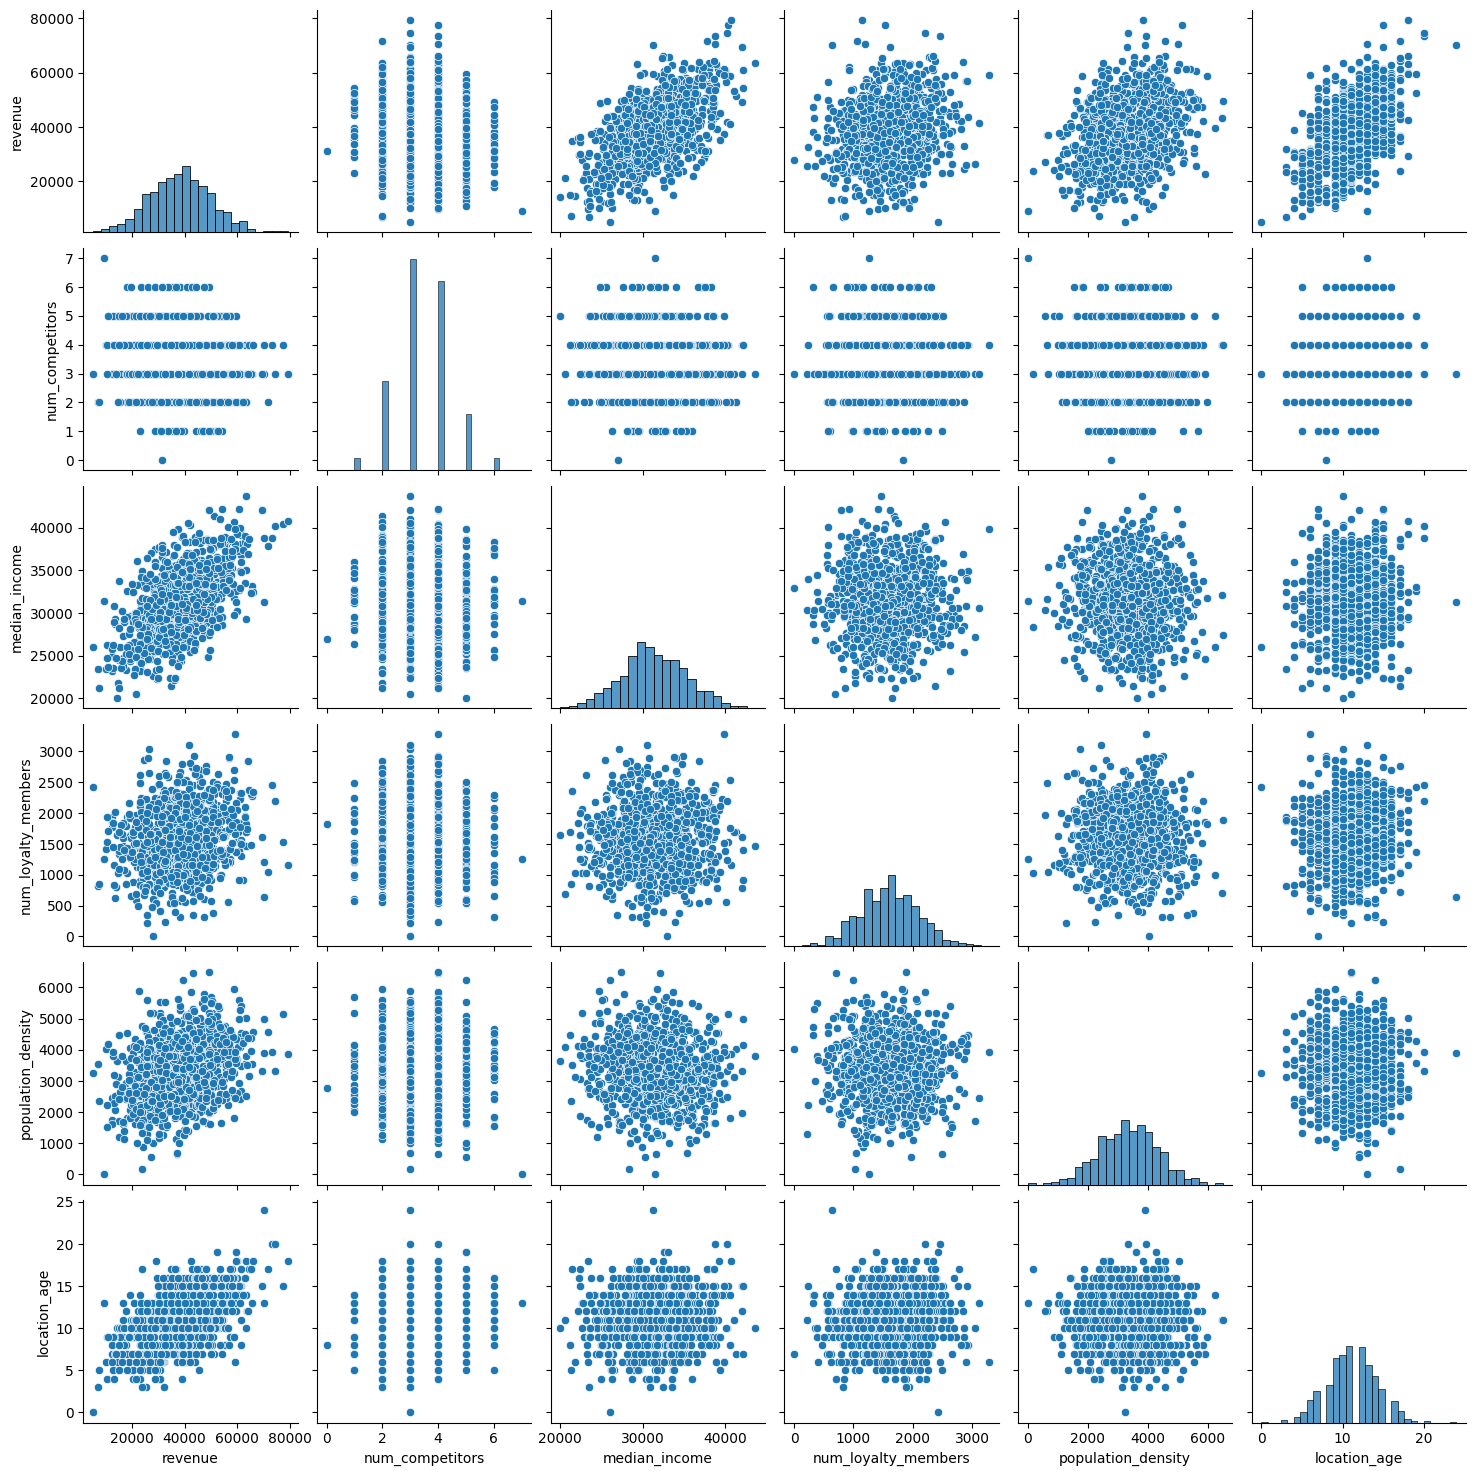

In [10]:
sns.pairplot(df)


Разбить данные

In [4]:
X = df[['num_competitors',
        'median_income',
        'num_loyalty_members',
        'population_density',
        'location_age']]

y = df['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)


Обучить модель

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Прогноз

In [11]:
predictions = model.predict(X_test)


Ошибки прогноза

In [14]:
print('RMSE: ' + str(mean_squared_error(predictions, y_test)**0.5))
print('MAE: ' + str(mean_absolute_error(predictions, y_test)))

RMSE: 5133.736391468814
MAE: 4161.387875602788


Удалить колонку с конкурентами

In [15]:
X_train2 = X_train.drop('num_competitors', axis=1)
X_test2 = X_test.drop('num_competitors', axis=1)

model.fit(X_train2, y_train)
predictions2 = model.predict(X_test2)

Пересчет ошибок

Ошибки увеличелись, значит при наличии num_competitors, модель была более точной.

Значит конкуренты влияют на доход!!!

In [16]:
print('RMSE: ' + str(mean_squared_error(predictions2, y_test)**0.5))
print('MAE: ' + str(mean_absolute_error(predictions2, y_test)))

RMSE: 5702.030002037037
MAE: 4544.416946418693
